In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 11. Smoothing Filter

**Detail: Implement the smoothing filter $(3*3)$.**

The smoothing filter is a filter that outputs the average value of the pixels in the filter.

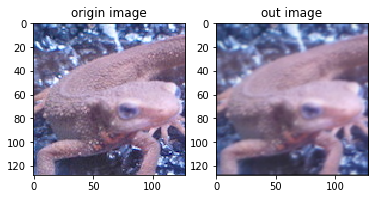

In [4]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

# Mean Filter
K_size = 3

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2,W+pad*2,C), dtype=np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[y+pad,x+pad,c] = np.mean(out[y:y+K_size,x:x+K_size,c])

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 12. Motion Filter

**Detail: Implement the motion filter $(3*3)$.**
The motion filter is a filter that takes the average value in the diagonal direction and is defined by the following equation.
```bash
 1/3  0   0
[ 0  1/3  0 ]
  0   0  1/3
```

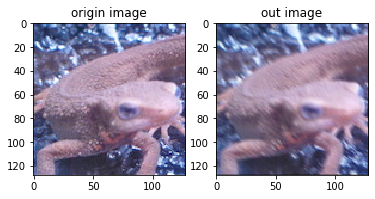

In [8]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

# Motion Filter
K_size = 3

K = np.diag([1]*K_size).astype(np.float)
K /= K_size

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2,C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c] = np.sum(K*tmp[y:y+K_size,x:x+K_size,c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 13. Max-Min Filter

**Detail: Implement the Max-Min filter $(3*3)$.**
The Max-Min filter is a filter that outputs the difference between the maximum value and the minimum value of pixels in the filter, and is one of the filters for **edge detection**. Edge detection is to detect a line in an image, and an operation to extract information in such an image is called **feature extraction**. For edge detection, filtering is performed on grayscale images in many casses.

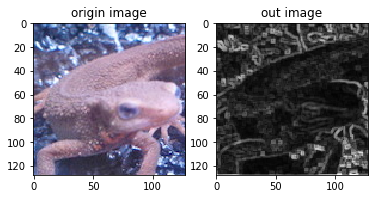

In [10]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126*r + 0.7152*g + 0.0722*b
gray = gray.astype(np.uint8)

# Max-Min Filter
K_size = 3

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2),dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        out[pad+y,pad+x] = np.max(tmp[y:y+K_size,x:x+K_size]) - np.min(tmp[y:y+K_size,x:x+K_size])
        
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 14. Differential Filter

The differential filter is a filter that extracts the edge of the portion where the abrupt change in luminance occurs and take the difference between the adjancent pixels.
```bash
     (a) Vertical Direction     (b) Horizontal Direction
             0 -1  0                          0  0  0    
       K = [ 0  1  0 ]                 k = [ -1  1  0 ]
             0  0  0                          0  0  0
```

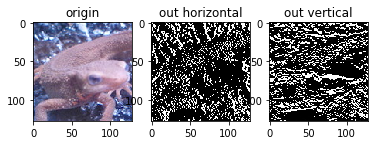

In [19]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722*b
gray = gray.astype(np.uint8)

# Differential Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Differential vertical
K_v = [[0., -1., 0.], [0., 1., 0.], [0., 0., 0.]]
# Differential horizontal
K_h = [[0., 0., 0.], [-1., 1., 0.], [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()

### 15. Sobel Filter

**Detail: Implement the Sobel filter $(3*3)$**

The Sobel filter is a filter that extracts only edges in a specific direction (vertical and horizontal) and is defined by the following equation.
```bash
     (a) Horizontal Direction     (b) Vertical Direction
             1  0  -1                          1   2   1    
       K = [ 2  1  -2 ]                 k = [  0   0   0 ]
             1  0  -1                         -1  -2  -1
```

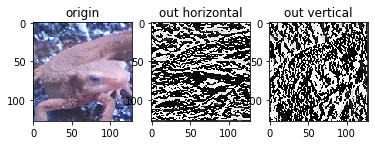

In [18]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722*b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Sobel vertical
K_v = [[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]
# Sobel horizontal
K_h = [[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()

### 16. Prewitt Filter

**Detail: Implement the Prewitt filter $(3*3)$**
The Prewitt filter is a type of edge extraction filter and is defined by the following equation.
```bash
     (a) Vertical Direction     (b) Horizontal Direction
            -1 -1  -1                         -1   0   1    
       K = [ 0  0   0 ]                 k = [ -1   0   1 ]
             1  1   1                         -1   0   1
```

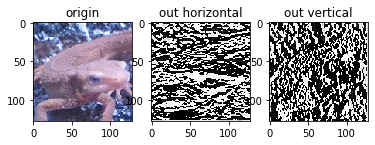

In [22]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Prewitt Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Prewitt vertical
K_v = [[-1., 0., 1.], [-1., 0., 1.], [-1., 0., 1.]]
# Prewitt horizontal
K_h = [[-1., -1., -1.], [0., 0., 0.], [1., 1., 1.]]


for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()